In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
moore = pd.read_csv('moore.csv', sep='\t', header=None)
moore

,0,1,2,3,4,5
0,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²
5,TMS 1000,"8,000",1974[7],Texas Instruments,"8,000 nm",NaN
6,MOS Technology 6502,"3,510[8]",1975,MOS Technology,"8,000 nm",21 mm²
7,Intel 8085,"6,500",1976,Intel,"3,000 nm",20 mm²
8,Zilog Z80,"8,500",1976,Zilog,"4,000 nm",18 mm²
9,Intel 8086,"29,000",1978,Intel,"3,000 nm",33 mm²


In [3]:
moore[1] = moore[1].str.replace(',','')
moore.head(10)

,0,1,2,3,4,5
0,Intel 4004,2300,1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,3500,1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,4500,1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,4100,1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,5000,1974,RCA,"5,000 nm",27 mm²
5,TMS 1000,8000,1974[7],Texas Instruments,"8,000 nm",NaN
6,MOS Technology 6502,3510[8],1975,MOS Technology,"8,000 nm",21 mm²
7,Intel 8085,6500,1976,Intel,"3,000 nm",20 mm²
8,Zilog Z80,8500,1976,Zilog,"4,000 nm",18 mm²
9,Intel 8086,29000,1978,Intel,"3,000 nm",33 mm²


In [4]:
moore[[1,2]] = moore[[1,2]].apply(pd.to_numeric, errors='coerce', downcast='integer')
moore.head(10)

,0,1,2,3,4,5
0,Intel 4004,2300.0,1971.0,Intel,"10,000 nm",12 mm²
1,Intel 8008,3500.0,1972.0,Intel,"10,000 nm",14 mm²
2,Intel 8080,4500.0,1974.0,Intel,"6,000 nm",20 mm²
3,Motorola 6800,4100.0,1974.0,Motorola,"6,000 nm",16 mm²
4,RCA 1802,5000.0,1974.0,RCA,"5,000 nm",27 mm²
5,TMS 1000,8000.0,NaN,Texas Instruments,"8,000 nm",NaN
6,MOS Technology 6502,NaN,1975.0,MOS Technology,"8,000 nm",21 mm²
7,Intel 8085,6500.0,1976.0,Intel,"3,000 nm",20 mm²
8,Zilog Z80,8500.0,1976.0,Zilog,"4,000 nm",18 mm²
9,Intel 8086,29000.0,1978.0,Intel,"3,000 nm",33 mm²


In [5]:
moore = moore.dropna(axis=0, how='any')
moore.head(10)

,0,1,2,3,4,5
0,Intel 4004,2300.0,1971.0,Intel,"10,000 nm",12 mm²
1,Intel 8008,3500.0,1972.0,Intel,"10,000 nm",14 mm²
2,Intel 8080,4500.0,1974.0,Intel,"6,000 nm",20 mm²
3,Motorola 6800,4100.0,1974.0,Motorola,"6,000 nm",16 mm²
4,RCA 1802,5000.0,1974.0,RCA,"5,000 nm",27 mm²
7,Intel 8085,6500.0,1976.0,Intel,"3,000 nm",20 mm²
8,Zilog Z80,8500.0,1976.0,Zilog,"4,000 nm",18 mm²
9,Intel 8086,29000.0,1978.0,Intel,"3,000 nm",33 mm²
10,Motorola 6809,9000.0,1978.0,Motorola,"5,000 nm",21 mm²
11,Intel 8088,29000.0,1979.0,Intel,"3,000 nm",33 mm²


In [6]:
moore[[1,2]] = moore[[1,2]].apply(pd.to_numeric, errors='coerce', downcast='integer')
moore.head(10)

/Users/lukasz/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,0,1,2,3,4,5
0,Intel 4004,2300.0,1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,3500.0,1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,4500.0,1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,4100.0,1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,5000.0,1974,RCA,"5,000 nm",27 mm²
7,Intel 8085,6500.0,1976,Intel,"3,000 nm",20 mm²
8,Zilog Z80,8500.0,1976,Zilog,"4,000 nm",18 mm²
9,Intel 8086,29000.0,1978,Intel,"3,000 nm",33 mm²
10,Motorola 6809,9000.0,1978,Motorola,"5,000 nm",21 mm²
11,Intel 8088,29000.0,1979,Intel,"3,000 nm",33 mm²


In [7]:
moore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 98
Data columns (total 6 columns):
0    66 non-null object
1    66 non-null float64
2    66 non-null int16
3    66 non-null object
4    66 non-null object
5    66 non-null object
dtypes: float64(1), int16(1), object(4)
memory usage: 3.2+ KB


In [8]:
x = moore[2].values
x

array([1971, 1972, 1974, 1974, 1974, 1976, 1976, 1978, 1978, 1979, 1979,
       1982, 1982, 1985, 1989, 1991, 1993, 1996, 1997, 1997, 1998, 1999,
       1999, 1999, 1999, 2000, 2000, 2001, 2002, 2002, 2003, 2003, 2003,
       2004, 2004, 2005, 2005, 2006, 2006, 2006, 2006, 2007, 2007, 2007,
       2008, 2008, 2008, 2008, 2009, 2010, 2010, 2010, 2011, 2011, 2012,
       2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2014, 2015, 2015], dtype=int16)

In [9]:
y = moore[1].values
y

array([  2.30000000e+03,   3.50000000e+03,   4.50000000e+03,
         4.10000000e+03,   5.00000000e+03,   6.50000000e+03,
         8.50000000e+03,   2.90000000e+04,   9.00000000e+03,
         2.90000000e+04,   6.80000000e+04,   5.50000000e+04,
         1.34000000e+05,   2.75000000e+05,   1.18023500e+06,
         1.35000000e+06,   3.10000000e+06,   4.30000000e+06,
         8.80000000e+06,   7.50000000e+06,   7.50000000e+06,
         2.13000000e+07,   2.20000000e+07,   2.74000000e+07,
         9.50000000e+06,   4.20000000e+07,   2.10000000e+07,
         4.50000000e+07,   2.20000000e+08,   5.50000000e+07,
         1.05900000e+08,   5.43000000e+07,   4.10000000e+08,
         5.92000000e+08,   1.12000000e+08,   1.69000000e+08,
         2.28000000e+08,   2.41000000e+08,   2.91000000e+08,
         1.84000000e+08,   3.62000000e+08,   1.69000000e+08,
         4.11000000e+08,   7.89000000e+08,   4.70000000e+07,
         2.30000000e+08,   7.31000000e+08,   1.90000000e+09,
         9.04000000e+08,

### Exponencial

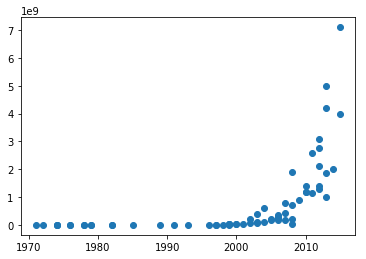

In [10]:
plt.scatter(x, y)
plt.show()

### Linear

In [11]:
y_log = np.log(y)

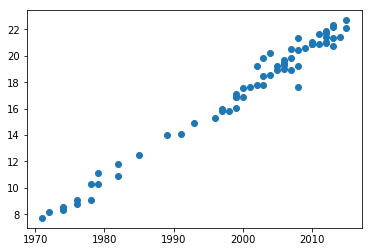

In [12]:
plt.scatter(x, y_log)
plt.show()

### Calculate a and b

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
X = x[:, np.newaxis]
model.fit(X, y_log)
a, b = model.coef_[0], model.intercept_

In [15]:
a, b

(0.33813195318291461, -658.93147674207376)

### Calculate predicted Y

In [16]:
y_hat = a * x + b

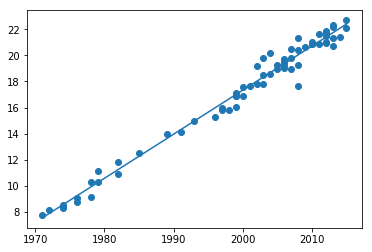

In [17]:
plt.scatter(x, y_log)
plt.plot(x, y_hat)
plt.show()

### Calculate r-squared

In [18]:
from sklearn.metrics import r2_score
r2_score(y_log, model.predict(X))

0.98082373905767029

### Test

In [19]:
x_test = 2020
y_pred_log = a * x_test + b
y_pred = np.exp(y_pred_log)
x_test, y_pred

(2020, 29130998578.835102)

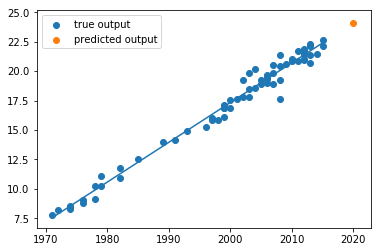

In [21]:
plt.scatter(x, y_log, label='true output')
plt.plot(x, y_hat)
plt.scatter(x_test, y_pred_log, label='predicted output')
plt.legend()
plt.show()

In [34]:
y_pred = np.exp(model.predict([[x_test]]))
x_test, y_pred[0]

(2020, 29130998578.835102)